In [1]:
!pip install yfinance
from datetime import date
import pandas as pd
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 10.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 4.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=317853 sha256=fe058aae33cc462b04f4824b5a68926953b42010e1349a5843918c81b6530404
  Stored in directory: /root/.cache/pip/wheels/75/79/e5/8838db0594cc6c587142fd2563356392ade6255c5930411069
Successfully built peewee


In [2]:
import yfinance as yf

In [3]:
howmanyyears = int(input("How many years? > ")) # <-- Getting user input for years

How many years? >  3


In [4]:
today = date.today()

In [5]:
END_DATE = today.isoformat()

In [6]:
START_DATE = date(today.year - howmanyyears, today.month, today.day).isoformat()

In [7]:
whichstock = input("Which stock? > ") # <-- Getting user input for stock name

Which stock? >  BABA


In [8]:
data = yf.download(whichstock, start=START_DATE, end=END_DATE)


[*********************100%***********************]  1 of 1 completed


In [9]:
data.reset_index(inplace=True)

In [10]:
data['Date'] = pd.to_datetime(data.Date) # <-- Inserting the 'Date' Feature

In [11]:
# Outputting the first 15 rows of data
print(data.head(15)) 
print(f"Data: {data.shape}") 

Price        Date   Adj Close       Close        High         Low        Open  \
Ticker                   BABA        BABA        BABA        BABA        BABA   
0      2021-12-13  118.052864  122.239998  123.250000  119.750000  123.000000   
1      2021-12-14  122.244209  126.580002  127.650002  120.300003  120.930000   
2      2021-12-15  118.274986  122.470001  123.589996  117.769997  122.629997   
3      2021-12-16  116.131027  120.250000  125.690002  118.900002  122.320000   
4      2021-12-17  117.917664  122.099998  122.870003  117.809998  119.489998   
5      2021-12-20  111.060867  115.000000  118.830002  113.695000  118.500000   
6      2021-12-21  118.767525  122.980003  122.980003  116.599998  116.849998   
7      2021-12-22  113.774605  117.809998  118.660004  115.150002  117.089996   
8      2021-12-23  114.595497  118.660004  119.589996  115.389999  116.800003   
9      2021-12-27  112.596390  116.589996  121.800003  116.101997  117.800003   
10     2021-12-28  110.86771

In [12]:
# Calculate the 50-period and 200-period EMA
data['EMA-50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA-200'] = data['Close'].ewm(span=200, adjust=False).mean()

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

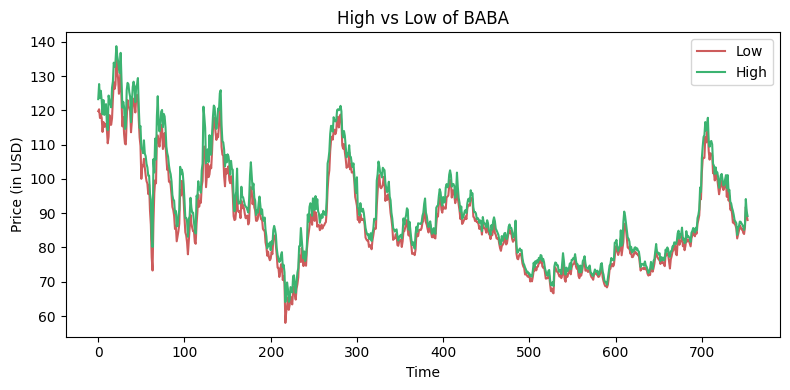

In [14]:
# High vs Low Graph
plt.figure(figsize=(8, 4))
plt.plot(data['Low'], label="Low", color="indianred")
plt.plot(data['High'], label="High", color="mediumseagreen")
plt.ylabel('Price (in USD)')
plt.xlabel("Time")
plt.title(f"High vs Low of {whichstock}")
plt.tight_layout()
plt.legend()

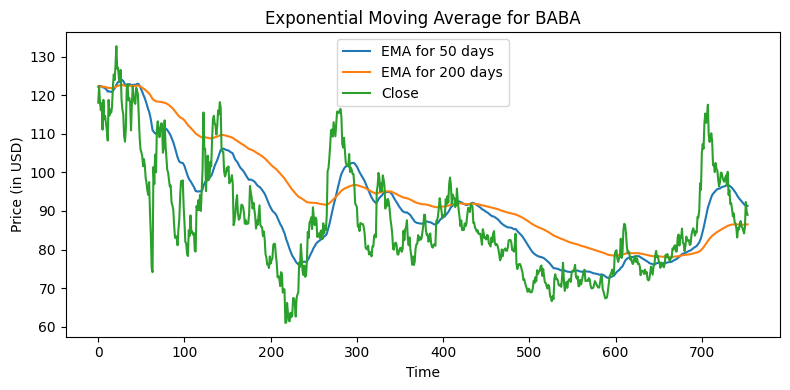

In [15]:
# Exponential Moving Average Graph
plt.figure(figsize=(8, 4))
plt.plot(data['EMA-50'], label="EMA for 50 days")
plt.plot(data['EMA-200'], label="EMA for 200 days")
plt.plot(data['Adj Close'], label="Close")
plt.title(f'Exponential Moving Average for {whichstock}')
plt.ylabel('Price (in USD)')
plt.xlabel("Time")
plt.legend()
plt.tight_layout()

In [16]:
x = data[['Open', 'High', 'Low', 'Volume', 'EMA-50', 'EMA-200']]
y = data['Close']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [18]:
# Step 5: Show the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (603, 6)
Testing Features Shape: (151, 6)
Training Target Shape: (603, 1)
Testing Target Shape: (151, 1)


In [19]:
# Step 1: Save the training and testing data to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [20]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train) 


LinearRegression()

In [21]:
pred = lr_model.predict(X_test)

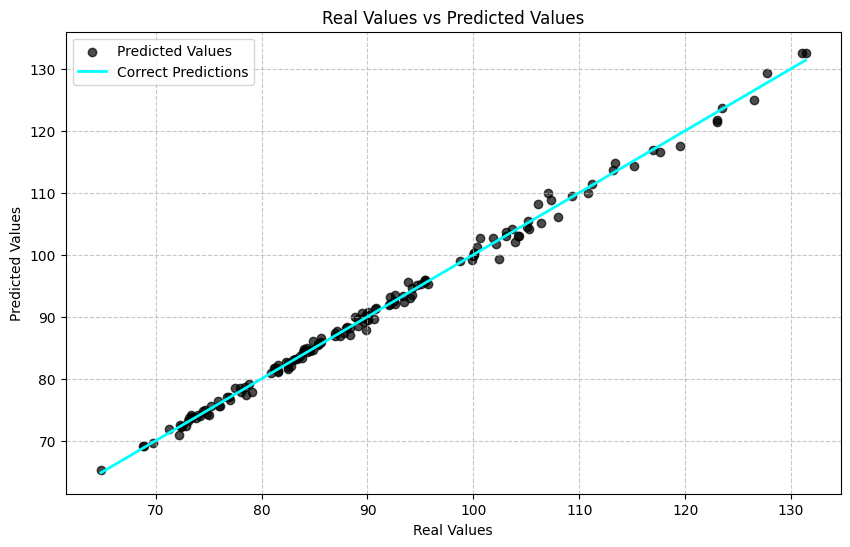

In [31]:
import matplotlib.pyplot as plt

# Assuming `y_test` is the actual values and `pred` is the predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, pred, color='black', alpha=0.7, label='Predicted Values')

# Perfect prediction line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='cyan', linestyle='-', linewidth=2, label='Correct Predictions')

# Adding title and labels
plt.title('Real Values vs Predicted Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a custom grid for better readability (optional)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [23]:
import numpy as np
import pandas as pd

# Ensure y_test and pred are 1D arrays
y_test = np.ravel(y_test)  # Flatten if needed
pred = np.ravel(pred)      # Flatten if needed

# Combine the actual and predicted prices into a DataFrame
data = pd.DataFrame({'Real Prices': y_test, 'Predicted Prices': pred})

# Randomly select 5 rows from the DataFrame
random_days = data.sample(n=5, random_state=42)  # Adjust `n` for the number of days you want to print

# Print the selected days' real vs predicted prices
print("Real vs Predicted Prices on Random Days:")
print(random_days)

Real vs Predicted Prices on Random Days:
     Real Prices  Predicted Prices
76     75.269997         75.527620
18     94.199997         93.510539
82     74.169998         74.001390
81     92.169998         92.013099
143    78.459999         78.593773


In [24]:
print(data.head(10))

   Real Prices  Predicted Prices
0    87.930000         88.157765
1    74.510002         74.751895
2    89.699997         89.183223
3    83.339996         83.153701
4   103.110001        103.689467
5    76.980003         76.490453
6    81.510002         81.308926
7    93.839996         95.533250
8    73.139999         73.679206
9   104.220001        102.969702


In [25]:
print(data.describe())

       Real Prices  Predicted Prices
count   151.000000        151.000000
mean     90.413178         90.429310
std      14.260428         14.232364
min      64.839996         65.264900
25%      81.045002         81.026812
50%      88.330002         88.157765
75%     100.020000         99.526218
max     131.369995        132.580202


In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R² score
r2 = r2_score(y_test, pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred)

# Print the results
print("Model Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


Model Performance Metrics:
R² Score: 0.9964
Mean Absolute Error (MAE): 0.6314
Mean Squared Error (MSE): 0.7212


In [27]:
import pandas as pd

# Calculate residuals
residuals = y_test - pred

# Create a DataFrame for better readability
residuals_df = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': pred, 'Residuals': residuals})

# Display the residuals
print(residuals_df.head(10))  # Display the first 10 residuals


   Actual Prices  Predicted Prices  Residuals
0      87.930000         88.157765  -0.227764
1      74.510002         74.751895  -0.241893
2      89.699997         89.183223   0.516774
3      83.339996         83.153701   0.186295
4     103.110001        103.689467  -0.579466
5      76.980003         76.490453   0.489550
6      81.510002         81.308926   0.201076
7      93.839996         95.533250  -1.693254
8      73.139999         73.679206  -0.539207
9     104.220001        102.969702   1.250299


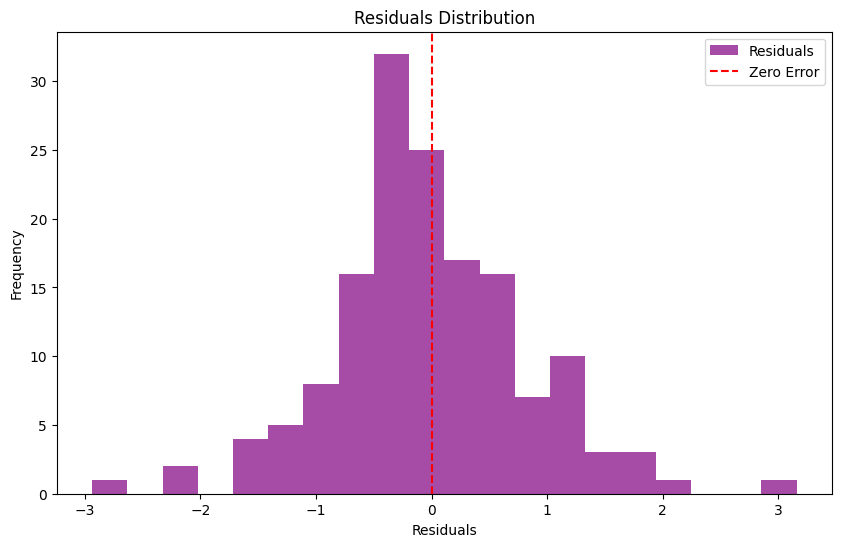

In [28]:
import matplotlib.pyplot as plt

# Plot the residuals distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='purple', alpha=0.7, label='Residuals')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


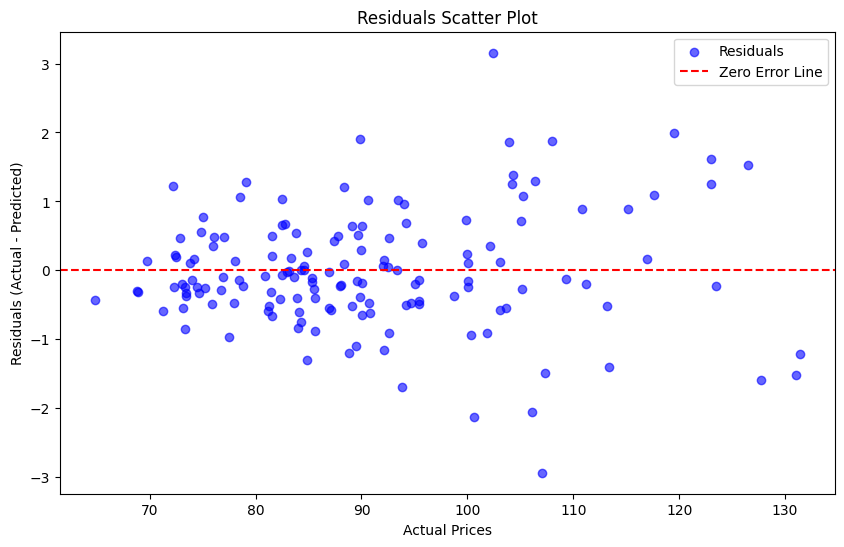

In [29]:
# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residuals Scatter Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()


In [30]:
# Save the model to a .pkl file
import pickle
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

print("Model saved successfully as 'lr_model.pkl'")

Model saved successfully as 'lr_model.pkl'
